## Violin Plots & Box Plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

fuel_econ = pd.read_csv('data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Violin Plot
There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

In [4]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

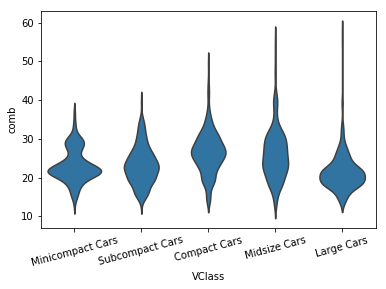

In [27]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, inner = None)
plt.xticks(rotation = 15)

#### Additional variation

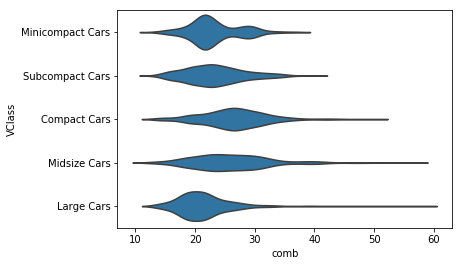

In [10]:
sb.violinplot(data = fuel_econ, y = 'VClass', x = 'comb', color = base_color, inner = None)

### Box Plot
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level.

![title](images/boxPlot.png)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

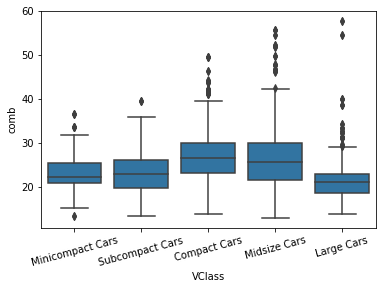

In [18]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

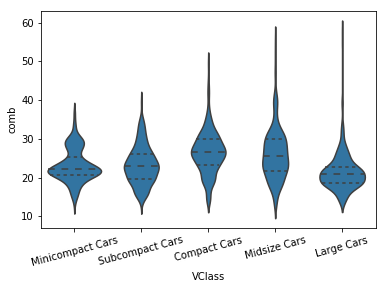

In [19]:
sb.violinplot(data = fuel_econ, 
              x = 'VClass', y = 'comb', 
              color = base_color, inner = 'quartile')
plt.xticks(rotation = 15)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(6.966470319355816, 63.09321945242605)

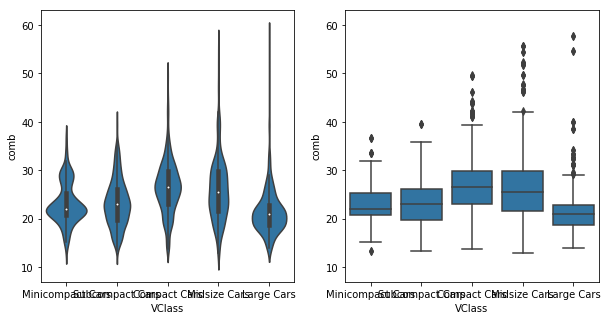

In [24]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

#left plot: Violin plot
plt.subplot(1,2,1)
ax1= sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)

#right plot: Box plot
plt.subplot(1,2,2)
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.ylim(ax1.get_ylim()) # Set y-axis limits to be the same as left plot

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

### Aditional variation

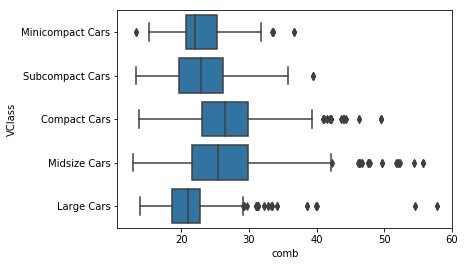

In [25]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, y = 'VClass', x = 'comb', color = base_color)